<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**
Joshua Dollison

MAT421-16133

2/2/2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import time

# **17.4: Lagrange Polynomial Interpolation**

Lagrange interpolation constructs a single polynomial that passes through all given data points.  The course text states that This polynomial is referred to as a Lagrange polynomial, $L(x)$, and as an interpolation function, it should have the property $L(x_i) = y_i$ for every point in the data set. For computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange basis polynomials, $P_i(x)$, where, $ P_i(x) = \prod_{j=1, j \neq i}^{n} \frac{x - x_j}{x_i-x_j}$ and $L(x) = \sum^n_{i=1} y_iP_i(x)$. The sum of Lagrange basis polynomials, ensure that it exactly interpolates the dataset.

The example below demonstrates an implementation using a randomly generated dataset and the scipy lagrange implementation.

In [2]:
def generate_arrays(n, max):
    array1 = np.arange(0, n + 1)  # First array: [1, 2, 3, ..., n]
    array2 = np.random.randint(0, max, size=n+1)  # Second array: Random values between 1 and 20

    return array1, array2

x, y = generate_arrays(7, 20)
#print(x)
#print(y)

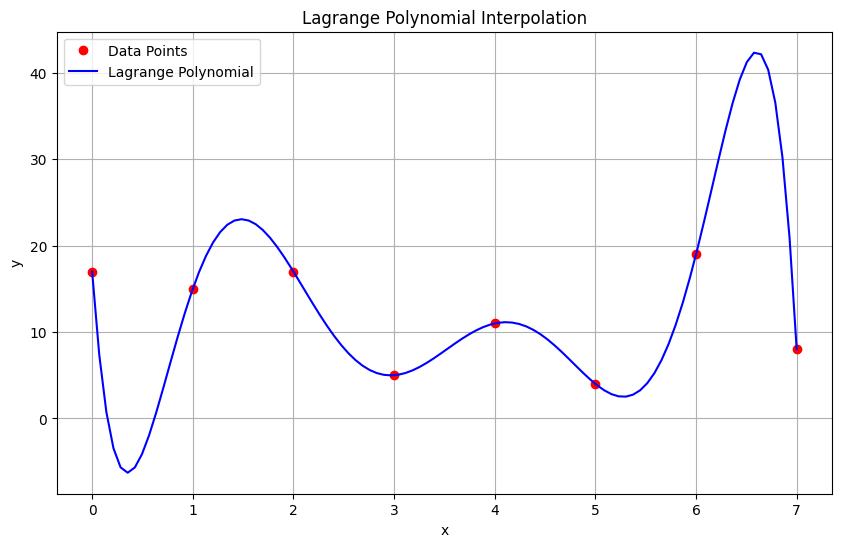

In [3]:
# Compute Lagrange Polynomial
poly = lagrange(x, y)

# Generate x values for plotting
x_new = np.linspace(0, 7, 100)
y_new = poly(x_new)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_new, y_new, 'b-', label='Lagrange Polynomial')
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# **17.5: Newton's Polynomial Interpolation**

Newton's interpolation method constructs a polynomial using **divided differences**, making it efficient for adding new data points without recomputing the entire polynomial.  The class text states that The general form of the an $n - 1$ order Newton's polynomial that goes through $n$ points is:

$$
\begin{align}
f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \cdot\cdot\cdot + a_n(x-x_0)(x-x_1)\cdot\cdot\cdot(x-x_n)
\end{align}
$$

which can be re-written as: $f(x) = \sum^n_{i=0}a_in_i(x)$ where
$n_i(x)=\prod^{i-1}_{j=0}(x-x_j)$

The special feature of the Newton's polynomial is that the coefficients $a_i$
can be determined using a very simple mathematical procedure.

The example below demonstrates an implementation using the same randomly generated dataset as the Lagrange example and the divided difference implementation presented in the book.

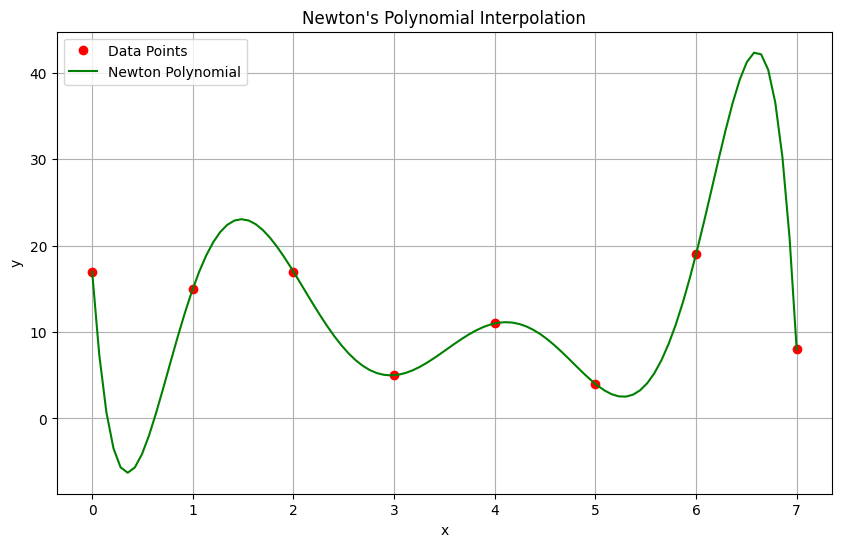

In [4]:
# Newton's Interpolation Function
def divided_differences(x, y):
    """Compute divided differences table."""
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_polynomial(coef, x_data, x):
    """Evaluate Newton's polynomial at x."""
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

# Compute coefficients
coef = divided_differences(x, y)

# Evaluate polynomial
x_vals = np.linspace(0, 7, 100)
y_vals = newton_polynomial(coef, x, x_vals)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_vals, y_vals, 'g-', label='Newton Polynomial')
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# **Comparison of Methods**

Lagrange is simple and intuitive.  Lagrange can be the preferred method when you have a smaller set of data points and just need a quick interpolation.

If you need to interpolate large datasets, or incrementally add points, Newton's method is the preferred choice due to efficiency and numerical stability.

https://math.stackexchange.com/questions/1509340/newton-form-vs-lagrange-form-for-interpolating-polynomials

The example below demonstrates the widening performance gap between the two methodologies as the size of the dataset grows.  We can see that with a smaller dataset, 10 elements, the two perform similarly.  As the dataset size grows, however, the performance difference grows.  Eventually, at 500 elements, we see that the Lagrange methodology takes approximately 8 times longer to run.

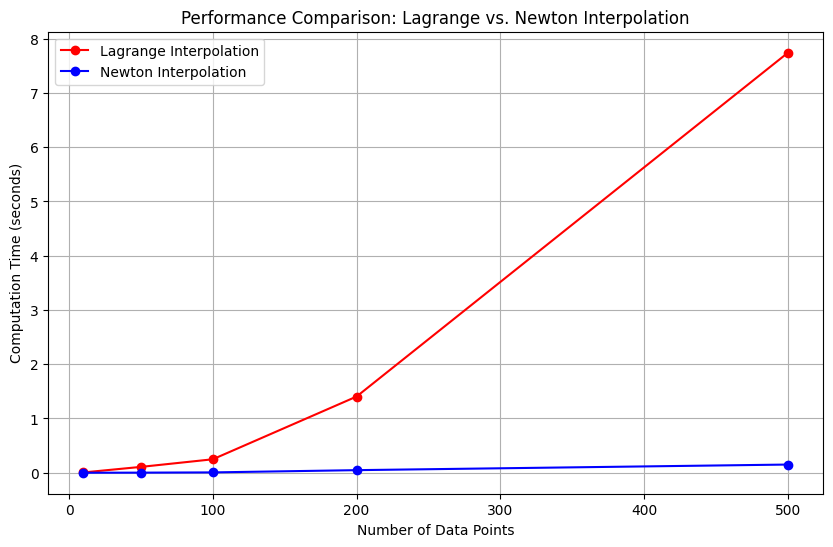

In [7]:
# Define dataset sizes for comparison
dataset_sizes = [10, 50, 100, 200, 500]

lagrange_times = []
newton_times = []

# Run performance tests
for n in dataset_sizes:
    # Generate random dataset
    x = np.linspace(0, 10, n)
    y = np.sin(x)

    # Lagrange time measurement
    start_time = time.time()
    poly_lagrange = lagrange(x, y)
    poly_lagrange(x)  # Evaluate polynomial
    lagrange_times.append(time.time() - start_time)

    # Newton time measurement
    start_time = time.time()
    coef_newton = divided_differences(x, y)
    newton_polynomial(coef_newton, x, x)  # Evaluate polynomial
    newton_times.append(time.time() - start_time)

# Plot performance comparison
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, lagrange_times, 'ro-', label="Lagrange Interpolation")
plt.plot(dataset_sizes, newton_times, 'bo-', label="Newton Interpolation")
plt.xlabel("Number of Data Points")
plt.ylabel("Computation Time (seconds)")
plt.title("Performance Comparison: Lagrange vs. Newton Interpolation")
plt.legend()
plt.grid()
plt.show()
